<a href="https://colab.research.google.com/github/Gunawanworks/machine_learning/blob/main/Harris_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

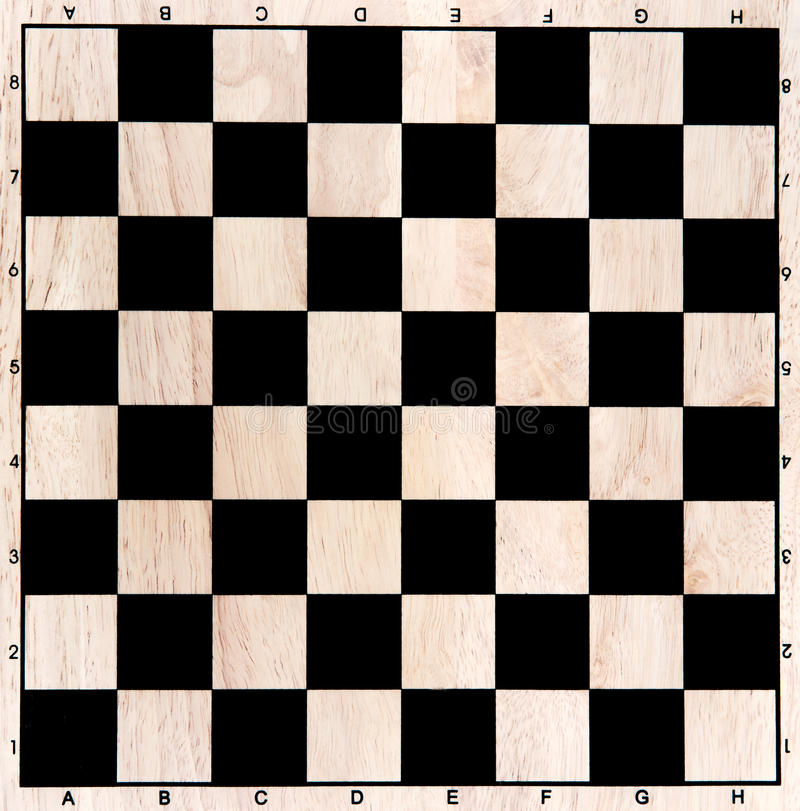

In [27]:
img = cv.imread('/content/chess.jpg')
cv2_imshow(img)

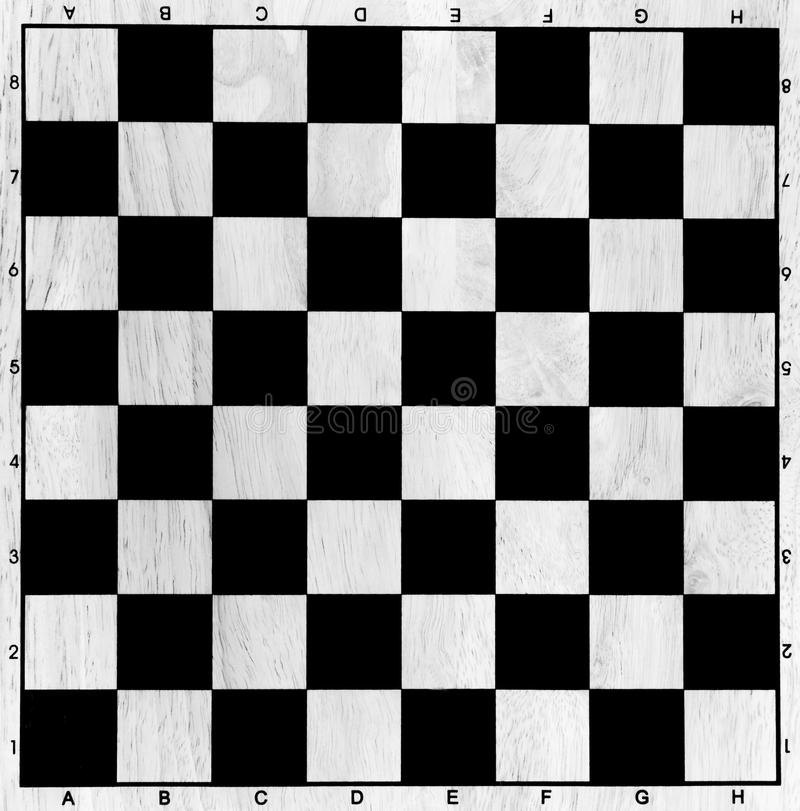

In [28]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

**CALCULATE DERRIVATIVES** 1

SOBEL KERNEL DIGUNAKAN UNTUK MENGHITUNG TURUNAN

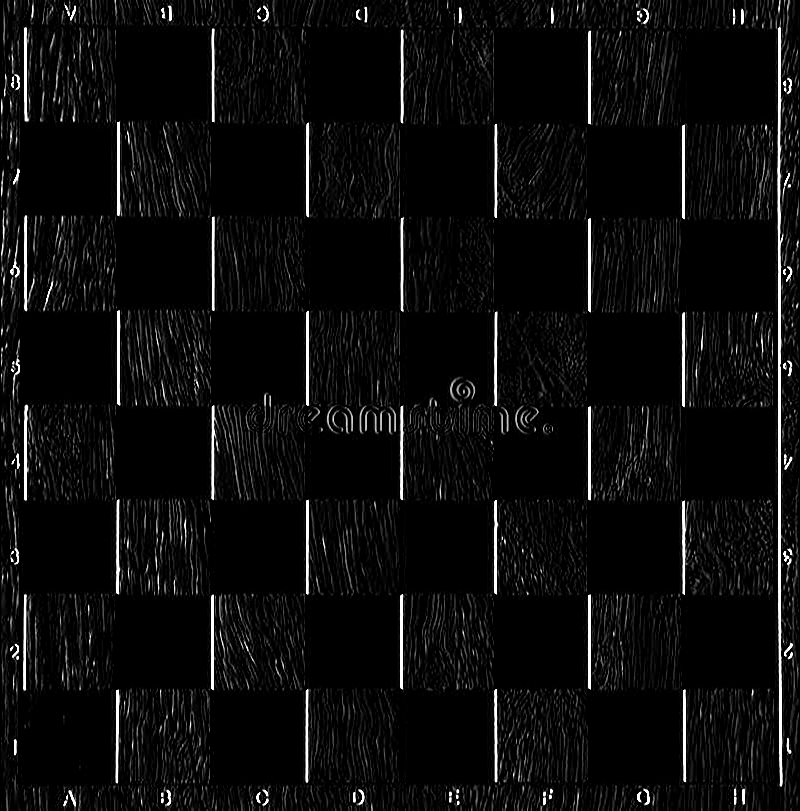

In [32]:
img_x = cv.Sobel(gray,cv.CV_64F,1,0)
cv2_imshow(img_x)

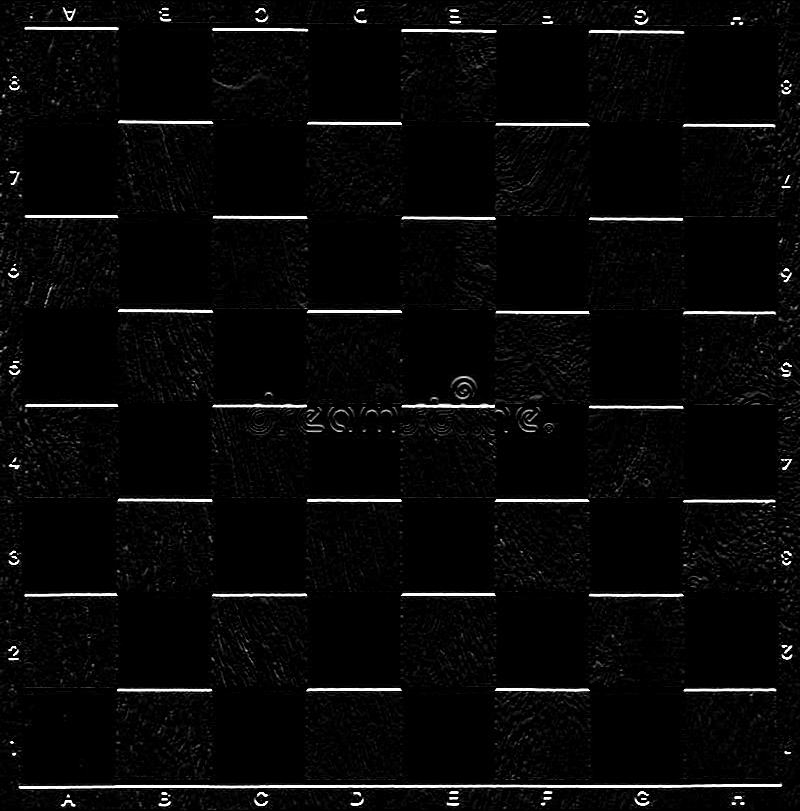

In [33]:
img_y = cv.Sobel(gray,cv.CV_64F,0,1)
cv2_imshow(img_y)

MENGHITUNG TURUNAN DARI SETIAP ARAH

In [36]:
img_x2 = np.square(img_x)
img_xy = img_x * img_y
img_y2 = np.square(img_y)

MENGHITUNG HASIL DARI TURUNAN DIATAS

In [37]:
s_xx = cv.GaussianBlur(img_x2, (5,5), 0)
s_xy = cv.GaussianBlur(img_xy, (5,5), 0)
s_yy = cv.GaussianBlur(img_y2, (5,5), 0)

In [39]:
# Compute the response of the detector at each point
k = .04 # Recommended value between .04 and .06
det_h = np.multiply(s_xx, s_yy) - np.multiply(s_xy, s_xy)
trace_h = s_xx + s_yy
R = det_h - k*np.multiply(trace_h, trace_h)

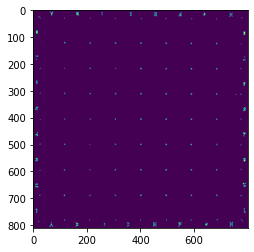

In [48]:
ratio = .2 # Number to tweak
thresh = abs(R) > ratio * abs(R).max()
plt.imshow(thresh)
plt.show()

In [43]:
# Compute non-maximal supression

# Get the indexes of the non zero values
non_zero_cords = np.nonzero(thresh)
tuple_cords = [(i, j) for i,j in zip(non_zero_cords[0], non_zero_cords[1])] 
values = [abs(R)[i, j] for i, j in tuple_cords]
sorted_cords = [tuple_cords[i] for i in np.argsort(values)[::-1]]
distance = 50 # Number to tweak 
nms_cords = []
nms_cords.append(sorted_cords[0])
for cord in sorted_cords:
    for nms_cord in nms_cords:
        if abs(cord[0]-nms_cord[0]) < distance and abs(cord[1]-nms_cord[1]) < distance:
            break
    else:
        nms_cords.append(cord)

print ("sebelum NMS = {} ".format(len(thresh)))
print ("sesudah NMS = {} ".format(len(nms_cords)))

sebelum NMS = 811 
sesudah NMS = 83 


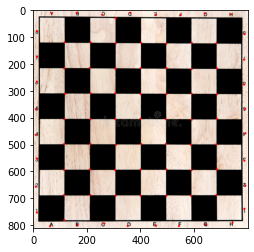

In [47]:
for nms_cord in nms_cords:
    cv.circle(img, (nms_cord[1], nms_cord[0]), 4, (0, 0, 255), -1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()